In [17]:
# Normalice todas las columnas numéricas usando la fórmula (valor - media) /
# desviación estándar. (esto ayduará al modelo K-means en la clusterizacion), a
# continuación, un ejemplo de código para la normalizción usando la clase
# StandarScaler

import pandas as pd

df = pd.read_csv('./data_examen_1.csv')

df

,customer_id,age,annual_income,spending_score,membership_type,gender
0,1,56,99,14,Gold,Female
1,2,69,101,76,Platinum,Male
2,3,46,56,87,Platinum,Male
3,4,32,38,15,Gold,Male
4,5,60,91,92,Platinum,Male
...,...,...,...,...,...,...
195,196,69,74,19,Platinum,Male
196,197,30,49,76,Silver,Male
197,198,58,94,9,Silver,Female
198,199,20,37,71,Gold,Male


In [18]:
numeric = df.select_dtypes(include='number')
df_normalizado = numeric.apply(lambda x: (x - x.mean()) / x.std())
df_normalizado

,customer_id,age,annual_income,spending_score
0,-1.719098,0.841593,1.115563,-1.257845
1,-1.701821,1.711629,1.195935,0.805560
2,-1.684543,0.172334,-0.612434,1.171648
3,-1.667266,-0.764628,-1.335782,-1.224565
4,-1.649989,1.109296,0.794075,1.338052
...,...,...,...,...
195,1.649989,1.711629,0.110913,-1.091442
196,1.667266,-0.898480,-0.893736,0.805560
197,1.684543,0.975444,0.914633,-1.424249
198,1.701821,-1.567738,-1.375968,0.639156


In [23]:
df = pd.concat([df_normalizado, df[["membership_type", "gender"]]], axis=1)
df

,customer_id,age,annual_income,spending_score,membership_type,gender
0,-1.719098,0.841593,1.115563,-1.257845,Gold,Female
1,-1.701821,1.711629,1.195935,0.805560,Platinum,Male
2,-1.684543,0.172334,-0.612434,1.171648,Platinum,Male
3,-1.667266,-0.764628,-1.335782,-1.224565,Gold,Male
4,-1.649989,1.109296,0.794075,1.338052,Platinum,Male
...,...,...,...,...,...,...
195,1.649989,1.711629,0.110913,-1.091442,Platinum,Male
196,1.667266,-0.898480,-0.893736,0.805560,Silver,Male
197,1.684543,0.975444,0.914633,-1.424249,Silver,Female
198,1.701821,-1.567738,-1.375968,0.639156,Gold,Male


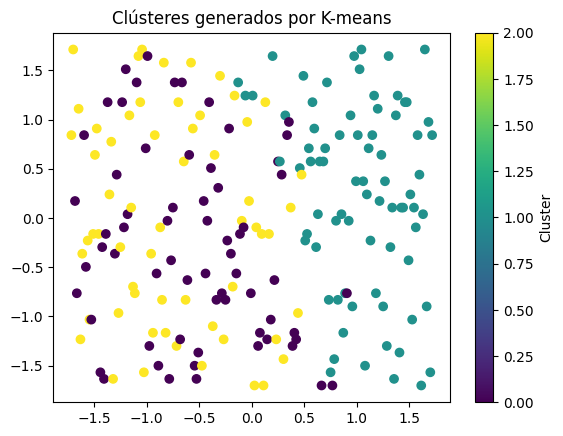

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)

df_normalizado["cluster"] = kmeans.fit_predict(df_normalizado)
# df_normalizado.iloc[:,0]
plt.scatter(df_normalizado.iloc[:,0],df_normalizado.iloc[:,1], c=df_normalizado["cluster"])
plt.title("Clústeres generados por K-means")
plt.colorbar(label="Cluster")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_normalizado.drop(columns=["cluster"])
y = df["membership_type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

modelo_svm = SVC(kernel="linear")
modelo_svm.fit(X_train, Y_train)


y_pred = modelo_svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(accuracy)

0.4
